In [473]:
import MeCab
import pandas as pd
import numpy as np
from pandas import DataFrame
from glob import glob
import matplotlib.pyplot as plt

In [254]:
pathlist = glob('/Users/katouryuusei/Downloads/CEJC/output/completed/**')
pathlist = sorted(pathlist)

In [463]:
pathlist[2][52:60]+ pathlist[2][-6:-4]

'C001_002_1'

In [445]:
pathlist[2][-6:-4]

'_1'

In [345]:
SpeakingStyle = DataFrame(columns=["I(明瞭さ)","F(親密さ)","C(社会階層)"])

In [346]:
SpeakingStyle

,I(明瞭さ),F(親密さ),C(社会階層)


In [384]:
SpeakingStyle = DataFrame()

In [464]:
index=[]
style=[]
for i in range(len(pathlist)):
    index.append(pathlist[i][52:60]+ pathlist[i][-6:-4])
    style.append(hinshi(pathlist[i]))

In [461]:
len(pathlist)

1154

In [465]:
len(style)

1154

In [466]:
df1 = DataFrame(data=index,columns=["話者"])
df2 = DataFrame(data=style,columns=["I(明瞭さ)","F(親密さ)","C(社会階層)"])

In [467]:
df1

,話者
0,C001_001_1
1,C001_001_2
2,C001_002_1
3,C001_002_2
4,C001_003_1
...,...
1149,W010_001_2
1150,W011_001_1
1151,W011_001_2
1152,W011_001_1


In [468]:
df2

,I(明瞭さ),F(親密さ),C(社会階層)
0,1.625677,-0.710417,0.234249
1,2.199660,-1.268873,0.937409
2,1.303939,-0.419311,-0.248308
3,2.402076,-1.734782,1.368565
4,2.298120,-1.466659,1.008448
...,...,...,...
1149,2.549485,-2.325612,1.635800
1150,1.751298,-1.172399,0.617417
1151,1.578488,-0.554384,-0.009805
1152,1.705878,-1.138194,0.492590


In [469]:
df = pd.concat([df1, df2], axis=1)

In [471]:
df.set_index(["話者"],inplace=True)

In [472]:
df

,I(明瞭さ),F(親密さ),C(社会階層)
話者,,,
C001_001_1,1.625677,-0.710417,0.234249
C001_001_2,2.199660,-1.268873,0.937409
C001_002_1,1.303939,-0.419311,-0.248308
C001_002_2,2.402076,-1.734782,1.368565
C001_003_1,2.298120,-1.466659,1.008448
...,...,...,...
W010_001_2,2.549485,-2.325612,1.635800
W011_001_1,1.751298,-1.172399,0.617417
W011_001_2,1.578488,-0.554384,-0.009805


In [496]:
df.to_csv("SpeakingStyle.csv")

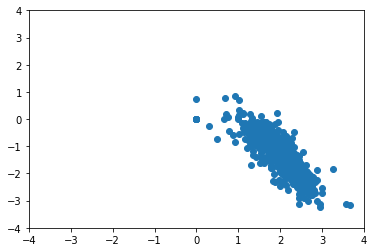

In [481]:
# 散布図を描画
plt.xlim(-4.0, 4.0)
plt.ylim(-4.0, 4.0)
plt.scatter(df["I(明瞭さ)"], df["F(親密さ)"])

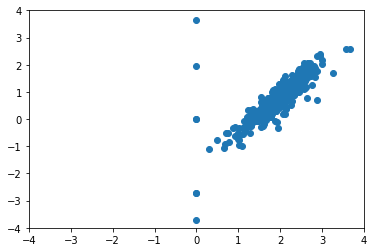

In [482]:
plt.xlim(-4.0, 4.0)
plt.ylim(-4.0, 4.0)
plt.scatter(df["I(明瞭さ)"], df["C(社会階層)"])

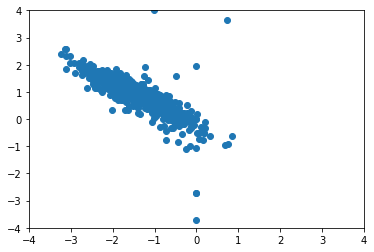

In [492]:
plt.xlim(-4.0, 4.0)
plt.ylim(-4.0, 4.0)
plt.scatter(df["F(親密さ)"], df["C(社会階層)"])

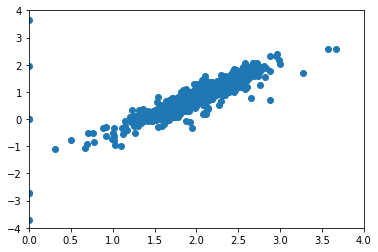

In [495]:
plt.xlim(0, 4.0)
plt.ylim(-4.0, 4.0)
plt.scatter(df["I(明瞭さ)"], df["C(社会階層)"])

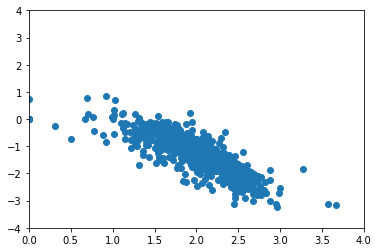

In [494]:
plt.xlim(0, 4.0)
plt.ylim(-4.0, 4.0)
plt.scatter(df["I(明瞭さ)"], df["F(親密さ)"])

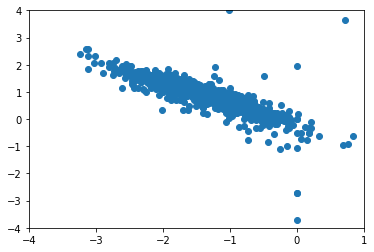

In [493]:
plt.xlim(-4.0, 1)
plt.ylim(-4.0, 4.0)
plt.scatter(df["F(親密さ)"], df["C(社会階層)"])

In [356]:
#path名を入れるとSpeaking Styleの三つの値を返す  I  F  C の順

def hinshi(path):
    #textファイルの読み込み
#＊＊＊＊には保存したtxtファイルのパス名を入れてください
    f= open(path, 'r', encoding='UTF-8')
    text=f.read()
    f.close()

    #読み込んだtextファイルで形態素解析を行う
    tagger =MeCab.Tagger("-d /usr/local/lib/mecab/dic/unidic/")
    tagger.parse('')
    node = tagger.parseToNode(text)
    
    #取り出す品詞を決めている.今回は名詞
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        #名詞の他にも動詞や形容詞なども追加できる
        if word_type in ["名詞"]:
            word_list.append(node.surface)
        node=node.next
    word_list = [s for s in word_list if s != 'ー']
    noun = len(word_list)


    #連体詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["連体詞"]:
            word_list.append(node.surface)
        node=node.next
    adno = len(word_list)


    #助動詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["助動詞"]:
            word_list.append(node.surface)
        node=node.next
    aux = len(word_list)
    ###
    desu = len([s for s in word_list if s == 'です'])
    masu = len([s for s in word_list if s == 'ます'])
    tyau = len([s for s in word_list if s == 'ちゃう'])

    #副詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["副詞"]:
            word_list.append(node.surface)
        node=node.next
    adv = len(word_list)
    ###
    kekko = len([s for s in word_list if s == '結構'])
    
    #動詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["動詞"]:
            word_list.append(node.surface)
        node=node.next
    v = len(word_list)

    #助詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["助詞"]:
            word_list.append(node.surface)
        node=node.next
    par= len(word_list)
    ###
    ne = len([s for s in word_list if s == 'ね'])
    yo = len([s for s in word_list if s == 'よ'])
    jya = len([s for s in word_list if s == 'じゃ'])


    #接頭辞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["接頭辞"]:
            word_list.append(node.surface)
        node=node.next
    pref = len(word_list)

    #代名詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["代名詞"]:
            word_list.append(node.surface)
        node=node.next
    pron = len(word_list)

    #形容詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["形容詞"]:
            word_list.append(node.surface)
        node=node.next
    adj = len(word_list)

    #感動詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["感動詞"]:
            word_list.append(node.surface)
        node=node.next
    int = len(word_list)
    
    #接尾辞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["接尾辞"]:
            word_list.append(node.surface)
        node=node.next
    suf = len(word_list)

    #接続詞
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_type = node.feature.split(',')[0]
        if word_type in ["接尾辞"]:
            word_list.append(node.surface)
        node=node.next
    conj = len(word_list)
    
    node = tagger.parseToNode(text)
    word_list=[]
    while node:
        word_list.append(node.surface)
        node = node.next
    
    
    #前後の2語を結合
    word_list2 = []
    for i in range(len(word_list)):
        word_list2.append(word_list[i-1]+word_list[i])


    toiu = len([s for s in word_list2 if s == 'と言う'])
    yone = len([s for s in word_list2 if s == 'よね'])
    keredomo = len([s for s in word_list2 if s == 'けれども'])
    toka = len([s for s in word_list2 if s == 'とか'])
    terute = len([s for s in word_list2 if s == 'てるて'])
    tteiu = len([s for s in word_list2 if s == 'って言う'])
    
    
    #全ての品詞
    morphemecount = noun + adno + aux + adv + v + par + pref + pron + adj + int + suf + conj
   
    func = par+aux+conj+adno+pref+suf
    nnc=morphemecount-noun
    
    SSC = 34.06*keredomo-21.21*yo-13.86*tyau+11.34*desu+11.34*masu-11.31*adno-9.44*toka-7.87*terute-7.04*aux-6.1*ne+4.89*func-2.84*adj-1.51*int
    SSF = -25.09*keredomo-19.92*desu-19.92*masu+19.79*yo+17.66*tyau-16.13*kekko+14.19*ne+12.26*pref+10.63*adno+9.06*toka+6.69*aux-5.79*func-5.46*toiu+4.54*pron+2.69*adj
    SSI = 35.1*keredomo+19.01*yone-15.16*tteiu+12.79*toiu+12.33*jya-11.3*adno-11.16*kekko-9.21*yo+7.65*desu+7.65*masu-7.44*ne-6.02*terute-4.63*aux+3.67*func+3.13*adv+2.24*v+1.09*par
    a = nnc-3.09 
    b = nnc+2.72
    c = nnc-1.78
    if a != 0:
        I = SSI/a
    else:
        I = 0
    if b != 0:
        F = SSF/b
    else:
        F = 0
    if c != 0:
        C = SSC/c
    else:
        C = 0
    C = SSC/c
    return I, F, C

    

In [319]:


#textファイルの読み込み
#＊＊＊＊には保存したtxtファイルのパス名を入れてください
f= open('/Users/katouryuusei/Downloads/CEJC/output/completed/C001_001-transUnit.TextGrid_1.txt', 'r', encoding='UTF-8')
text=f.read()
f.close()

#読み込んだtextファイルで形態素解析を行う
tagger =MeCab.Tagger("-d /usr/local/lib/mecab/dic/unidic/")
tagger.parse('')
node = tagger.parseToNode(text)
#取り出す品詞を決めている.今回は名詞
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["名詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
word_list = [s for s in word_list if s != 'ー']
noun = len(word_list)


#連体詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["連体詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
adno = len(word_list)


#助動詞

node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["助動詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
aux = len(word_list)


#副詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["副詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
adv = len(word_list)
kekko = len([s for s in word_list if s == '結構'])

#動詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["動詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
v = len(word_list)


#助詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["助詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
par= len(word_list)
  


#接頭辞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["接頭辞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
pref = len(word_list)

#代名詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["代名詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
pron = len(word_list)

#形容詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["形容詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
adj = len(word_list)

#感動詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["感動詞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
int = len(word_list)

#接尾辞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["接尾辞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
suf = len(word_list)

#接続詞
node = tagger.parseToNode(text)
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    #名詞の他にも動詞や形容詞なども追加できる
    if word_type in ["接尾辞"]:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)
conj = len(word_list)



node = tagger.parseToNode(text)
word_list=[]
while node:
    word_list.append(node.surface)
    node = node.next
    
    
#前後の2語を結合
word_list2 = []
for i in range(len(word_list)):
    word_list2.append(word_list[i-1]+word_list[i])


toiu = len([s for s in word_list2 if s == 'と言う'])
yone = len([s for s in word_list2 if s == 'よね'])
keredomo = len([s for s in word_list2 if s == 'けれども'])
toka = len([s for s in word_list2 if s == 'とか'])
terute = len([s for s in word_list2 if s == 'てるて'])
tteiu = len([s for s in word_list2 if s == 'って言う'])

morphemecount = noun + adno + aux + adv + v + par + pref + pron + adj + int + suf + conj
func = par+aux+conj+adno+pref+suf
nnc=morphemecount-noun

SSC = 34.06*keredomo-21.21*yo-13.86*tyau+11.34*desu+11.34*masu-11.31*adno-9.44*toka-7.87*terute-7.04*aux-6.1*ne+4.89*func-2.84*adj-1.51*int
SSF = -25.09*keredomo-19.92*desu-19.92*masu+19.79*yo+17.66*tyau-16.13*kekko+14.19*ne+12.26*pref+10.63*adno+9.06*toka+6.69*aux-5.79*func-5.46*toiu+4.54*pron+2.69*adj
SSI = 35.1*keredomo+19.01*yone-15.16*tteiu+12.79*toiu+12.33*jya-11.3*adno-11.16*kekko-9.21*yo+7.65*desu+7.65*masu-7.44*ne-6.02*terute-4.63*aux+3.67*func+3.13*adv+2.24*v+1.09*par

I = SSI/nnc-3.09
F = SSF/nnc+2.72
C = SSC/nnc-1.78




In [320]:
print(SSI)
print(SSF)
print(SSC)
print(I)
print(F)
print(C)

2941.1400000000003
-2085.6299999999997
1176.5199999999998
-1.1054251012145746
1.312692307692308
-0.98612685560054


In [167]:
print(noun)
print(adno)
print(aux)
print(adv)
print(v)
print(par)
print(pref)
print(pron)
print(adj)
print(int)
print(suf)
print(conj)

222
5
191
95
178
443
19
48
70
400
22
22


In [171]:
morphemecount = noun + adno + aux + adv + v + par + pref + pron + adj + int + suf + conj
morphemecount

1715

In [199]:
func = par+aux+conj+adno+pref+suf
nnc=morphemecount-noun

In [201]:
func

702

In [200]:
nnc

1493

In [105]:
noun=0 #名詞
adno=0 #連体詞
aux=0  #助動詞
adv=0  #副詞
v=0    #動詞
par=0  #助詞
pref=0 #接頭辞
pron=0 #代名詞
adj=0  #形容詞
int=0  #感動詞
suf=0  #接尾辞
conj=0 #接続詞

In [313]:
f= open('/Users/katouryuusei/Downloads/CEJC/output/completed/C001_001-transUnit.TextGrid_1.txt', 'r', encoding='UTF-8')
text=f.read()
f.close()


node = tagger.parseToNode(text)
word_list=[]
while node:
    word_list.append(node.surface)
    node = node.next
    
    
#前後の2語を結合
word_list2 = []
for i in range(len(word_list)):
    word_list2.append(word_list[i-1]+word_list[i])


toiu = len([s for s in word_list2 if s == 'と言う'])
yone = len([s for s in word_list2 if s == 'よね'])
keredomo = len([s for s in word_list2 if s == 'けれども'])
toka = len([s for s in word_list2 if s == 'とか'])
terute = len([s for s in word_list2 if s == 'てるて'])
tteiu = len([s for s in word_list2 if s == 'って言う'])

  

In [314]:
print(toiu)
print(yone)
print(keredomo)
print(toka)
print(terute)
print(tteiu)

0
8
0
5
0
1


In [309]:
word_list2 = []
for i in range(len(word_list)):
    word_list2.append(word_list[i-1]+word_list[i])

In [192]:
word_chain

'た な まし た まし た じゃ ませ ん ねー た だ てる な だ て てる た な る た たら でしょう てん た だ た だ た ませ ん た だ た だ た まじ な た だ た た だ ちゃっ た ない な な で ない た だ た ない た だ だ た だ なきゃ た ちゃっ た だ て た たら だ だ に て なかっ た ちゃっ た た だ てー たら に ちゃっ た だ た なかっ た た だ に だっ た だっ た だっ た らしい て た た た だ た たら た だ に たい た だ に やろ やろう てる だっ た ちゃっ た てる だ だ ない て た じゃ だ だ だ だ だ す た だ たら だ た た だ だ で じゃ てる てる たい らしい だ てん ちゃっ てる た ない に た だ れ た で て た でしょ に て た だー だ だ す なく ちゃっ た だっ た だ だ てん だ ちゃっ てる な だ ない ちゃっ た た て た に に だ た た た'

In [294]:
t[0]

'吾輩'

In [137]:
s = "吾輩は猫である。"

tagger = MeCab.Tagger("")
tagger.parse("")

node = tagger.parseToNode(s).next
while node.next:
    print(node.feature)
    node = node.next

代名詞,*,*,*,*,*,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,*,*,*,*,ワガハイ,ワガハイ,ワガハイ,ワガハイ,*,*,0,*,*
助詞,係助詞,*,*,*,*,ハ,は,は,ワ,は,ワ,和,*,*,*,*,ハ,ハ,ハ,ハ,*,*,*,"動詞%F2@0,名詞%F1,形容詞%F2@-1",*
名詞,普通名詞,一般,*,*,*,ネコ,猫,猫,ネコ,猫,ネコ,和,*,*,*,*,ネコ,ネコ,ネコ,ネコ,*,*,1,C4,*
助動詞,*,*,*,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,*,*,*,*,デ,ダ,デ,ダ,*,*,*,名詞%F1,*
動詞,非自立可能,*,*,五段-ラ行,終止形-一般,アル,有る,ある,アル,ある,アル,和,*,*,*,*,アル,アル,アル,アル,*,*,1,C3,*
補助記号,句点,*,*,*,*,,。,。,,。,,記号,*,*,*,*,,,,,*,*,*,*,*


In [2]:
#連体詞などは数えて代入しているだけ   funcとnncに変換

noun=0 #名詞
adno=0 #連体詞
aux=0  #助動詞
adv=0  #副詞
v=0    #動詞
par=0  #助詞
pref=0 #接頭辞
pron=0 #代名詞
adj=0  #形容詞
int=0  #感動詞
suf=0  #接尾辞
conj=0 #接続詞

In [ ]:
func = par+aux+conj+adno+pref+suf
nnc=morphemecount-noun

In [1]:
desu=0     #です　　　+ 品詞の条件
masu=0#ます
tyau=0#ちゃう
ne=0#とく
yo=0#なんか
kekko=0#ね



jya=0#よ　　　かつ　品詞の条件


In [ ]:
toiu=0　　     #と言う
yone=0      #よね
keredomo=0  #けれども
toka=0      #とか
terute=0    #てるて
tteiu=0     #って言う

In [ ]:
func = par+aux+conj+adno+pref+suf
nnc=morphemecount-noun

In [ ]:
SSC = 34.06*keredomo-21.21*yo-13.86*tyau+11.34*desu+11.34*masu-11.31*adno-9.44*toka-7.87*terute-7.04*aux-6.1*ne+4.89*func-2.84*adj-1.51*int

SSF = -25.09*keredomo-19.92*desu-19.92*masu+19.79*yo+17.66*tyau-16.13*kekko+14.19*ne+12.26*pref+10.63*adno+9.06*toka+6.69*aux-5.79*func-5.46*toiu+4.54*pron+2.69*adj

SSI = 35.1*keredomo+19.01*yone-15.16*tteiu+12.79*toiu+12.33*jya-11.3*adno-11.16*kekko-9.21*yo+7.65*desu+7.65*masu-7.44*ne-6.02*terute-4.63*aux+3.67*func+3.13*adv+2.24*v+1.09*par



In [ ]:
I = SSI/nnc-3.09
F = SSF/nnc+2.72
C = SSC/nnc-1.78